In [14]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy import stats
import collections
import numpy as np

In [15]:
P = np.array([[0.8,0.1,0.1],
[0.6,0.3,0.1],
[0.2,0.3,0.5]])

In [16]:
%matplotlib inline

In [17]:
#P=intensity

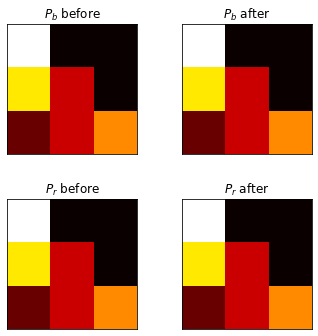

In [36]:
from matplotlib import cm

def post_process_ax(x,y,P,title):
    ax[x,y].matshow(P, cmap=cm.hot) 
    ax[x,y].set_title(title)
    plt.setp(ax[x,y].get_xticklabels(), visible=False)
    plt.setp(ax[x,y].get_yticklabels(), visible=False)
    ax[x,y].tick_params(axis='both', which='both', length=0)


fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5,5))
fig.tight_layout()
plt.tight_layout()

post_process_ax(0,0,P,'$P_b$ before')
post_process_ax(0,1,P,'$P_b$ after')
#plt.colorbar(im)
post_process_ax(1,0,P,'$P_r$ before')
post_process_ax(1,1,P,'$P_r$ after')

plt.show()

In [53]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


def plot_budget_reward(ax, graph_title, budgets, methods, budget_method_reward,show_legend=False,show_x=False,show_y=True):
    N = len(budgets)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars
    
    colors = ['r','b','g']
    
    rectss = [] 
    method_means = collections.defaultdict(list)
    method_stds = collections.defaultdict(list)
    for i,budget in enumerate(budgets):
        for j,method in enumerate(methods):
            rewards = budget_method_reward[budget][method]
        
            method_means[method].append(np.mean(rewards))
            method_stds[method].append(np.std(rewards))
            
    for i,method in enumerate(methods):
        rects = ax.bar(ind+(i-1)*width, method_means[method], width, color=colors[i], yerr=method_stds[method])
        rectss.append(rects)
            
            
    # add some text for labels, title and axes ticks
    
    if show_x:
        ax.set_xlabel('Budget, $B$')
    else:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.tick_params(axis='x', which='both', length=0)
        
    if show_y:
        ax.set_ylabel('Expected Group utility, $U_g$')
    else:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='y', which='both', length=0)
        
    
    
    
    
    ax.set_title(graph_title)
    
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(budgets))
        
    if show_legend:
        ax.legend(tuple([z[0] for z in rectss]), tuple(methods))
    
#     for rects in rectss:
#         autolabel(rects)
        


In [54]:
budgets = [25,50,75,100]
methods = ['Orginal', 'Baseline', 'MRP']

In [55]:
budget_method_reward = {
    25:{
        'Orginal':[1,1,1,1,1,1],
        'Baseline':[1,1,1,1,1,1],
        'MRP':[1,1,1,1,1,1]
    },
    50:{
        'Orginal':[.4,0.2,0.5,0.2,0.3,0.1],
        'Baseline':[0.9,1,1.1,1,1,1],
        'MRP':[1,1,1,1,1,.8]
    },
    75:{
        'Orginal':[1,1,1,1.1,1,1],
        'Baseline':[.4,0.2,0.5,0.2,0.3,0.1],
        'MRP':[1,1,1,1,1.2,1]
    },
    100:{
        'Orginal':[.4,0.2,0.5,0.2,0.3,0.1,1,1,1],
        'Baseline':[1,1,1,1,1,1],
        'MRP':[.4,0.2,0.5,0.2,0.3,0.1]
    }
}

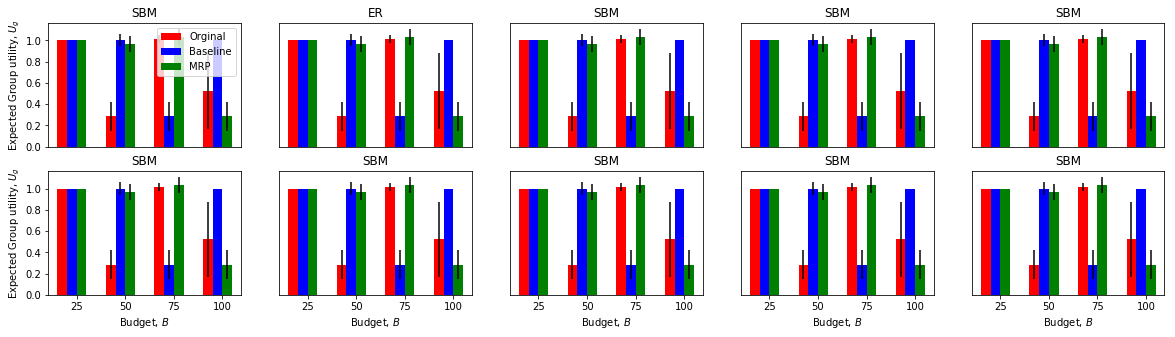

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=5,figsize=(20,5))

plot_budget_reward(ax[0,0], 'SBM', budgets, methods, budget_method_reward,show_legend=True,show_x=False,show_y=True)
plot_budget_reward(ax[0,1], 'ER', budgets, methods, budget_method_reward,show_legend=False,show_x=False,show_y=False)
plot_budget_reward(ax[0,2], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=False,show_y=False)
plot_budget_reward(ax[0,3], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=False,show_y=False)
plot_budget_reward(ax[0,4], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=False,show_y=False)
plot_budget_reward(ax[1,0], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=True,show_y=True)
plot_budget_reward(ax[1,1], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=True,show_y=False)
plot_budget_reward(ax[1,2], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=True,show_y=False)
plot_budget_reward(ax[1,3], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=True,show_y=False)
plot_budget_reward(ax[1,4], 'SBM', budgets, methods, budget_method_reward,show_legend=False,show_x=True,show_y=False)
plt.show()

[0 1 2 3 4]
women_std: (3, 5, 2, 3, 3)


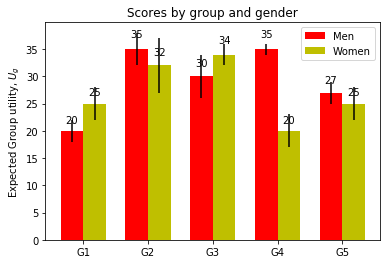

In [23]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

print(ind)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

print('women_std:',women_std)
# add some text for labels, title and axes ticks
ax.set_ylabel('Expected Group utility, $U_g$')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

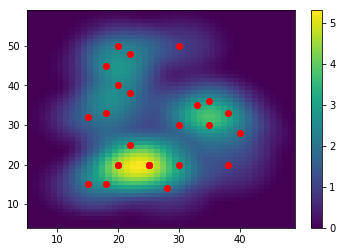

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

#POINT DATASET
x=[20,28,15,20,18,25,15,18,18,20,25,30,25,22,30,22,38,40,38,30,22,20,35,33,35]
y=[20,14,15,20,15,20,32,33,45,50,20,20,20,25,30,38,20,28,33,50,48,40,30,35,36]

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'ro')
plt.colorbar()
plt.show()